# Centrality measures
Centrality measures help us understand who are the most important people in the network. For this example, “email-Eu-core network,” from Stanford’s SNAP is used. You may find the original dataset here: https://snap.stanford.edu/data/email-Eu-core.html.. This is a dataset of various email communications between people, and we are interested about the important people, leaders and opinion makers in this network. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

For the purposes of this blog, I am filtering the data only for the first 100 people for brevity. Same analysis can be done across the complete dataset.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/jinhangjiang/Datasets/main/Network%20Data/emailEUcore/email-Eu-core.txt",delimiter = " ",names=["Source","Target"])
df = df.loc[(df.Source < 100) & (df.Target < 100)]
df.head()

,Source,Target
0,0,1
1,2,3
2,2,4
3,5,6
4,5,7


We are using a directed graph as we are interested emails being sent and received.

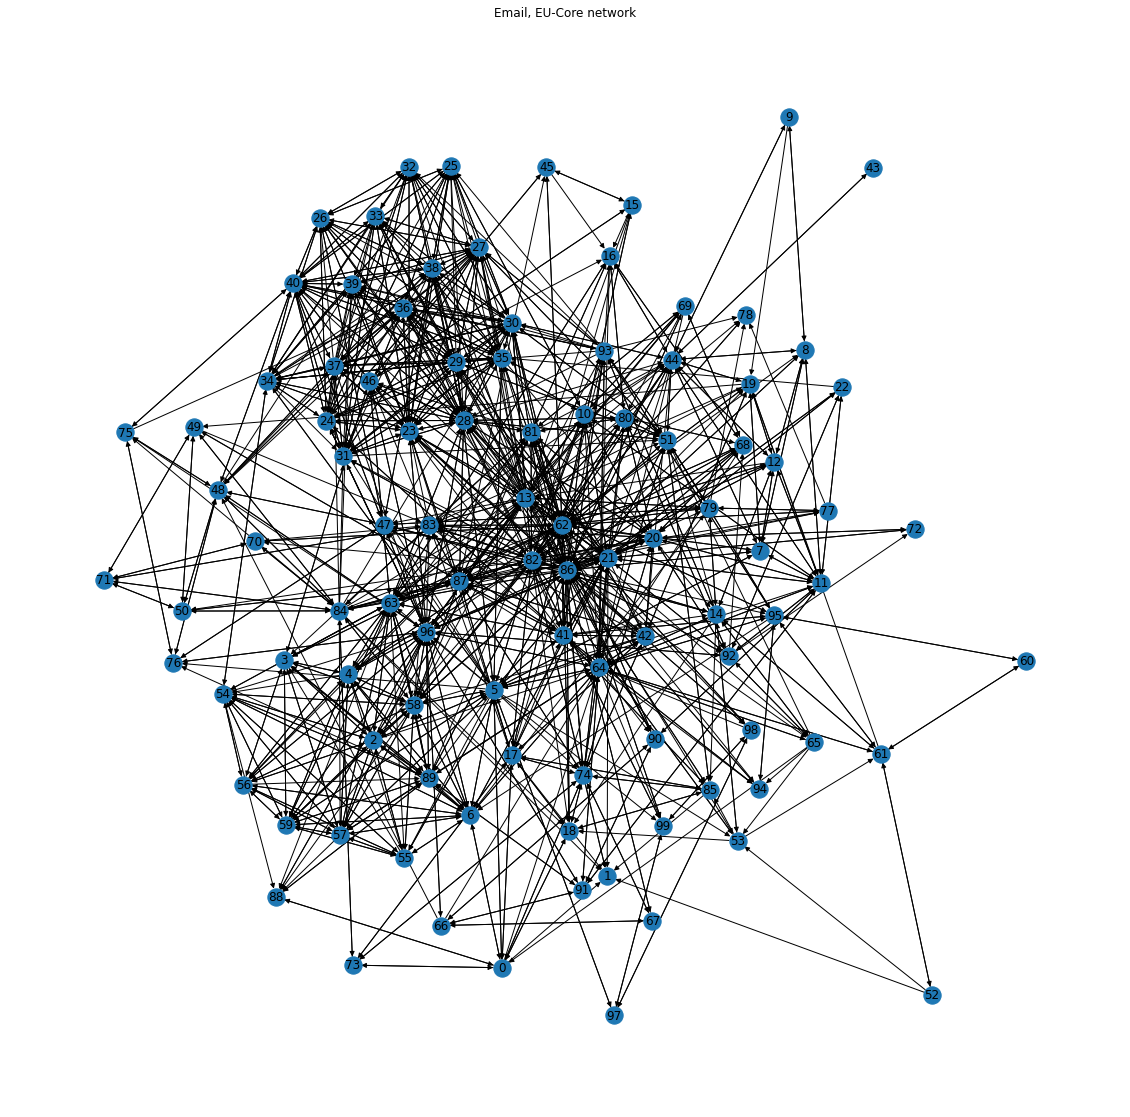

In [3]:
G = nx.from_pandas_edgelist(df, source='Source', target = 'Target', create_using=nx.DiGraph())
plt.subplots(figsize=(20,20))
plt.title('Email, EU-Core network')
nx.draw_kamada_kawai(G, with_labels=True)

We can see that there are two densily connected networks and many connections between them.  
Who is the most important person in the network? This is based on what is the question you are asking. Is it the person who can send the emails the fastest? Is it the person why can connect with maximum number of people? Some basic features would be:  
1. Just by the number of mails sent/received, who has sent the maximum number of mails
2. By the number of people that a person has a immediate relation with (a relation is defined as sending an email to that person): degree centrality
3. We can also look at the persons who are essential for communication between different closely knit groups. (betweenness centrality)

The person with the maximum number of interactions is:

In [4]:
student_sent_mails = list(df.groupby('Source')['Target'].count())
student_sent_mails.index(max(student_sent_mails))+1

86

We can say that the person with index 86 has the most number of interactions and is one of the most important person. He would be the go to person who has connections with maximum number of people. We can see this in the graph also.  

## Degree centrality
This way of looking at the importance of a person based on number of connections (Degrees) is called degree centrality. In ascending order, the top 10 people with maximum number of connections are:

In [5]:
degree_centrality = nx.algorithms.centrality.degree_centrality(G)
for i, w in enumerate(sorted(degree_centrality, key=degree_centrality.get, reverse=True)):
    if(i<10):
        print(w, degree_centrality[w])
    else:
        break

86 0.8282828282828284
62 0.7676767676767677
82 0.6464646464646465
96 0.6161616161616162
28 0.6060606060606061
21 0.5555555555555556
13 0.5353535353535354
23 0.5151515151515152
30 0.494949494949495
64 0.494949494949495


This network can be visualised with most size proportional to the importance according to degree centrality.

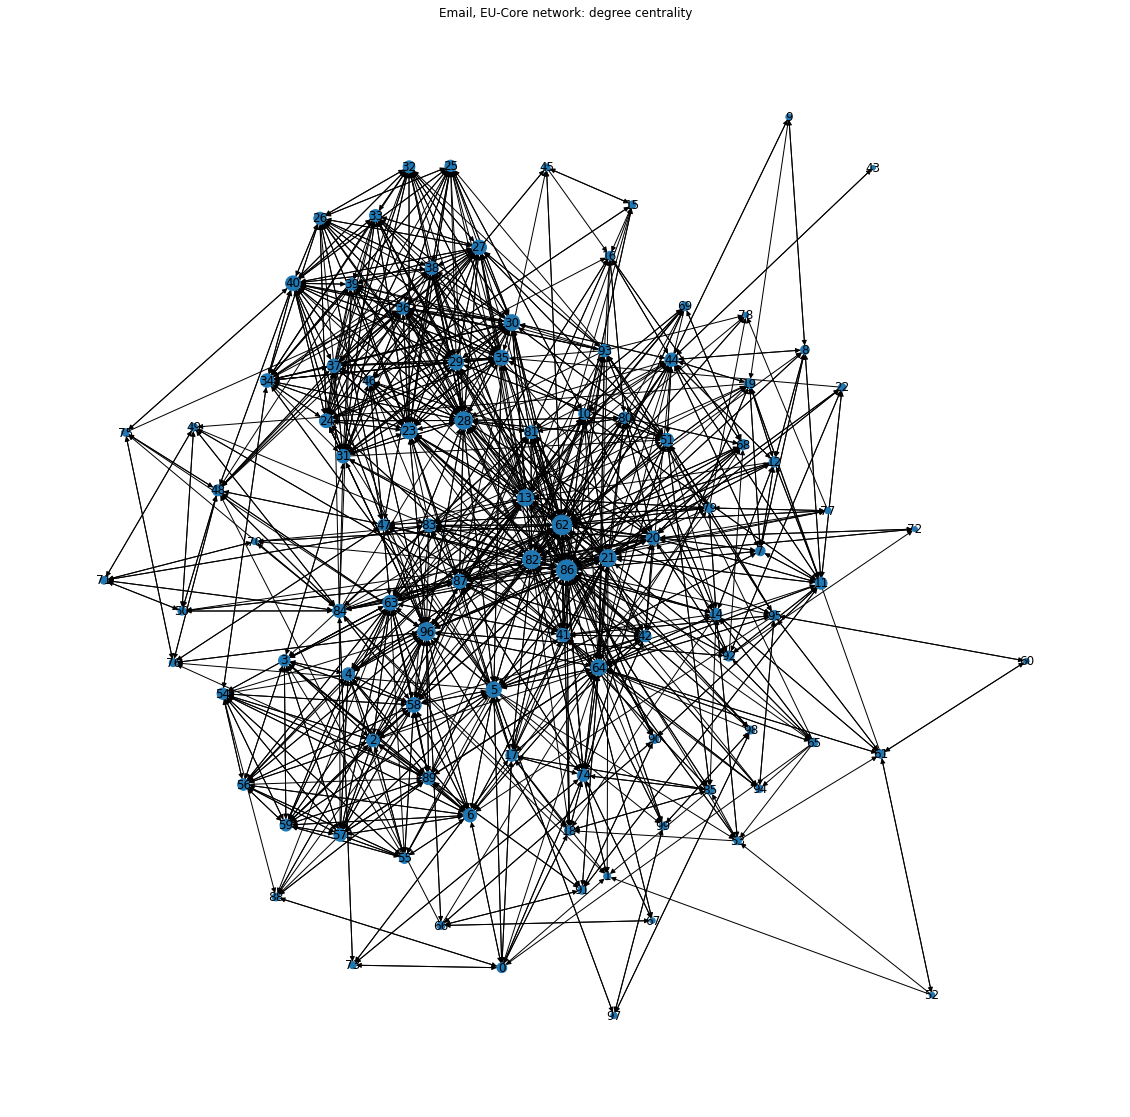

In [6]:
plt.subplots(figsize=(20,20))
plt.title('Email, EU-Core network: degree centrality')
nx.draw_kamada_kawai(G, with_labels=True, node_size=list(np.array(list(degree_centrality.values()))*500))

## Betweenness centrality
Although person 86 has sent mails to the maximum number of people, he has still sent mails to only 45 out of the 100 students. This means if we want to send a mail to the whole class, that there might be other important people thru whom the remaining people receive mails. We should identify people who are part of different closely knit groups and who are essential for passing information between groups. This is given by betweenness centrality. The most important people according to this metric in descending order are:

In [7]:
btw_centrality = nx.algorithms.centrality.betweenness_centrality(G)
for i, w in enumerate(sorted(btw_centrality.items(), key = lambda item:item[1], reverse = True)):
    if(i<10):
        print(w)
    else:
        break

(86, 0.14149427475629858)
(62, 0.12154539177634052)
(96, 0.08160276331043798)
(82, 0.0670387255089669)
(64, 0.06502342115189583)
(21, 0.05061277358840613)
(13, 0.04673865990243992)
(44, 0.04327552467861193)
(5, 0.0412363399245883)
(28, 0.03679924185307917)


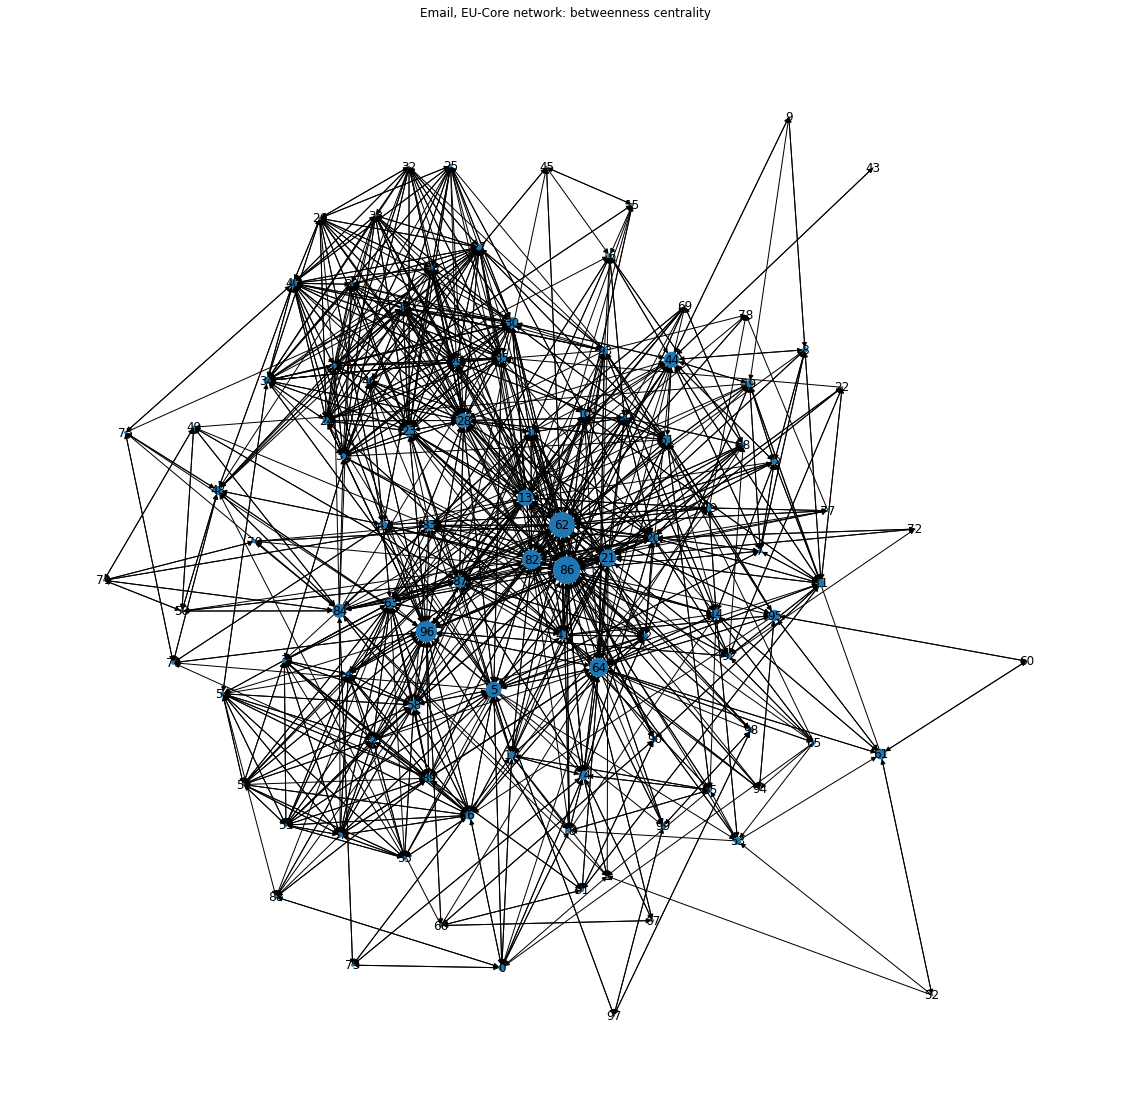

In [8]:
plt.subplots(figsize=(20,20))
plt.title('Email, EU-Core network: betweenness centrality')
nx.draw_kamada_kawai(G, with_labels=True, node_size=list(np.array(list(btw_centrality.values()))*5000))

We get the same people at the top, nut this time inclusding a few additional people.

## Page rank (Eigenvector centrality)
Another way to identify the important people in a network is to not only look at the number of people who are connected to the person but also the importance of the people whom they are connected to. The importance of the person can be defined as proportional to the sum of importance of the immediate people connected to him/her. This is defined by eigenvector centrality. Below is the top ten people who are important based on who they know and whom they are connected to:

In [9]:
ev_centrality = nx.algorithms.centrality.eigenvector_centrality(G)
for i, w in enumerate(sorted(ev_centrality.items(), key = lambda item:item[1], reverse = True)):
    if(i<10):
        print(w)
    else:
        break

(28, 0.25779806388704485)
(23, 0.2412215124270137)
(30, 0.21579251773540695)
(62, 0.2061936996975851)
(29, 0.1962488726486241)
(35, 0.19522994610327346)
(86, 0.18934292971595598)
(27, 0.1823911579409791)
(96, 0.18188010730196982)
(40, 0.1803640484660976)


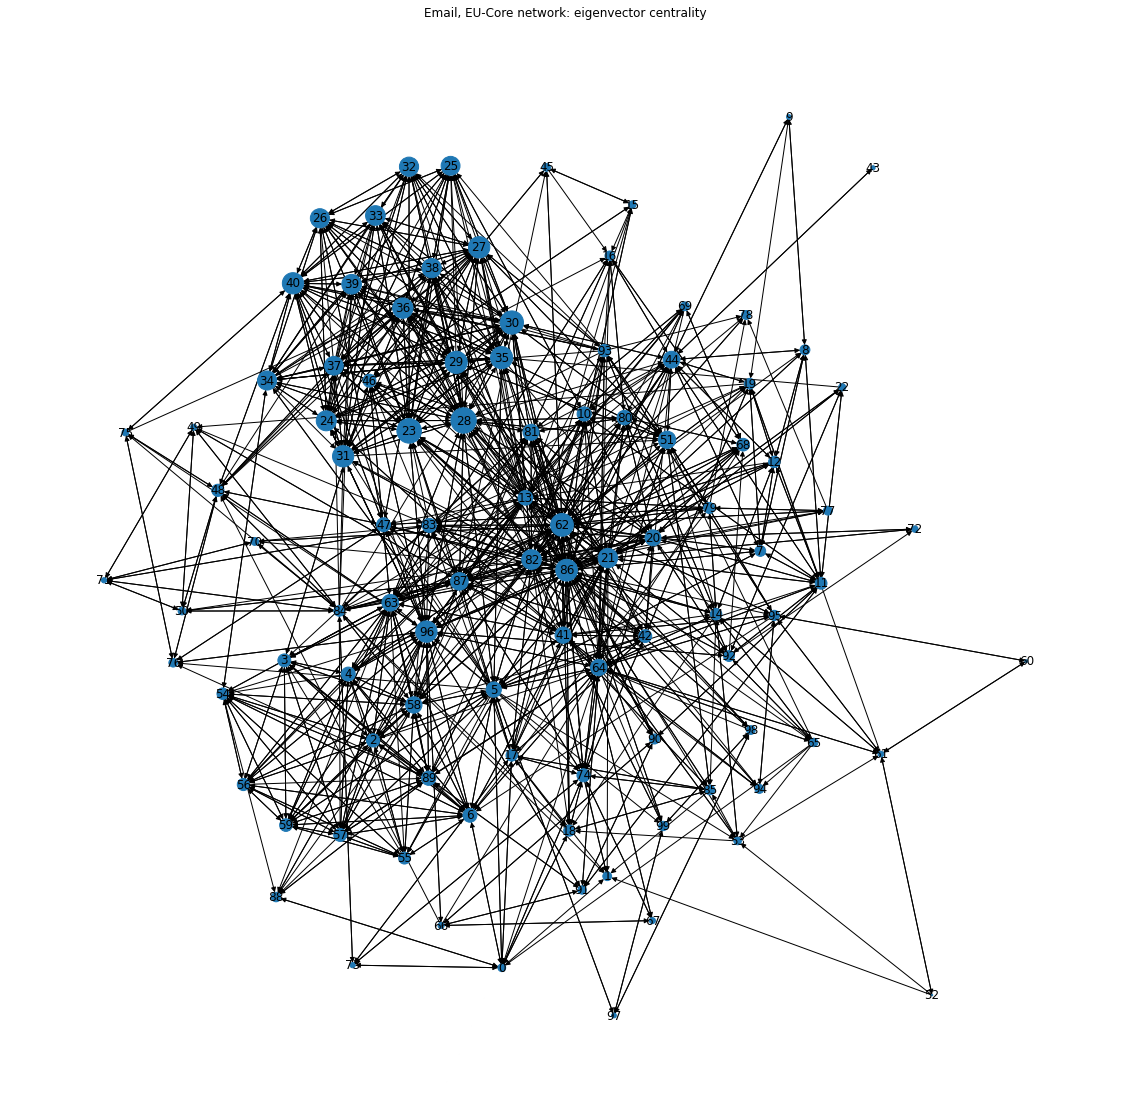

In [10]:
plt.subplots(figsize=(20,20))
plt.title('Email, EU-Core network: eigenvector centrality')
nx.draw_kamada_kawai(G, with_labels=True, node_size=list(np.array(list(ev_centrality.values()))*2500))

## Clustering coefficient
Any graph in general can be densely connected or sparcely connected. The behaviour of the graph, and therefore the actions that have to be taken, are different for sparce graphs vs densely connected graphs. The betweenness measures above should be looked at along with clustering coefficient. The clustering coefficient is a way of measuring the degree to which the nodes in a graph cluster together. Networks with high number of clustering coefficient are more social. The average clustering coefficient for the graph is (assuming a undirected graph):

In [11]:
G_undir = nx.from_pandas_edgelist(df, source='Source', target = 'Target')
nx.algorithms.cluster.average_clustering(G_undir)

0.5130839320504162

From the above analysis, we can find the most important people in the network. The people who has the most connections, the people who are part of multiple groups and are important to send message across and the people who are important based on whom they know immediately.  
## References
1. https://towardsdatascience.com/visualize-high-dimensional-network-data-with-3d-360-degree-animated-scatter-plot-d583932d3693  
2. Assignment and student notes, Business Analytics MSc, Imperial College London, Network Analytics module  
3. Hao Yin, Austin R. Benson, Jure Leskovec, and David F. Gleich. "Local Higher-order Graph Clustering." In Proceedings of the 23rd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining. 2017  
4. https://snap.stanford.edu/data/email-Eu-core.html  
5. *Networks, Crowds, and Markets: Reasoning about a Highly Connected World* by David Easley and Jon Kleinberg